# Comparing VAR-LiNGAM fit() and bootstrap() Methods

## 1. Setup and Data Preparation
This section imports necessary libraries and custom functions for data preprocessing, plotting, causal discovery, and evaluation.


In [1]:
import pandas as pd
import numpy as np
import time

print([np.__version__, pd.__version__])
np.set_printoptions(precision=3, suppress=True)


from src.data_preprocessing import preprocess_data
from src.plotting import plot_time_series, plot_heatmap, plot_causal_graph
from src.causal_matrix_evaluation import evaluate_causal_matrices, interpret_evaluation_metrics
from src.run_causal_discovery import run_varlingam, run_varlingam_bootstrap, grid_search_varlingam_bootstrap


['1.24.4', '2.0.3']


## 2. VAR-LiNGAM Execution Methods
Here we introduce two main execution methods for the VAR-LiNGAM algorithm: fit() and bootstrap(). We will use these methods to estimate causal structures and visualize the results.

### 2.1 fit() Method
The fit() method in VAR-LiNGAM provides a point estimate of the causal structure. It applies the algorithm once to the entire dataset to estimate the causal relationships.

Key characteristics:
- Computationally efficient
- Provides a single estimate of the causal structure
- May be sensitive to outliers or noise in the data

### 2.2 bootstrap() Method
The bootstrap() method applies the VAR-LiNGAM algorithm multiple times to resampled versions of the original dataset. This approach provides a distribution of estimates for each potential causal relationship.

Key characteristics:
- Computationally more intensive
- Provides a measure of uncertainty for each causal relationship
- Generally more robust to outliers and noise
- Can help identify stable causal relationships across different subsets of the data

In the following sections, we will apply both methods to our dataset, visualize their results, and compare their performance in terms of accuracy, robustness, and computational efficiency.


1. Loading, plotting, and preprocessing data...
Dataset shape: (1000, 5)


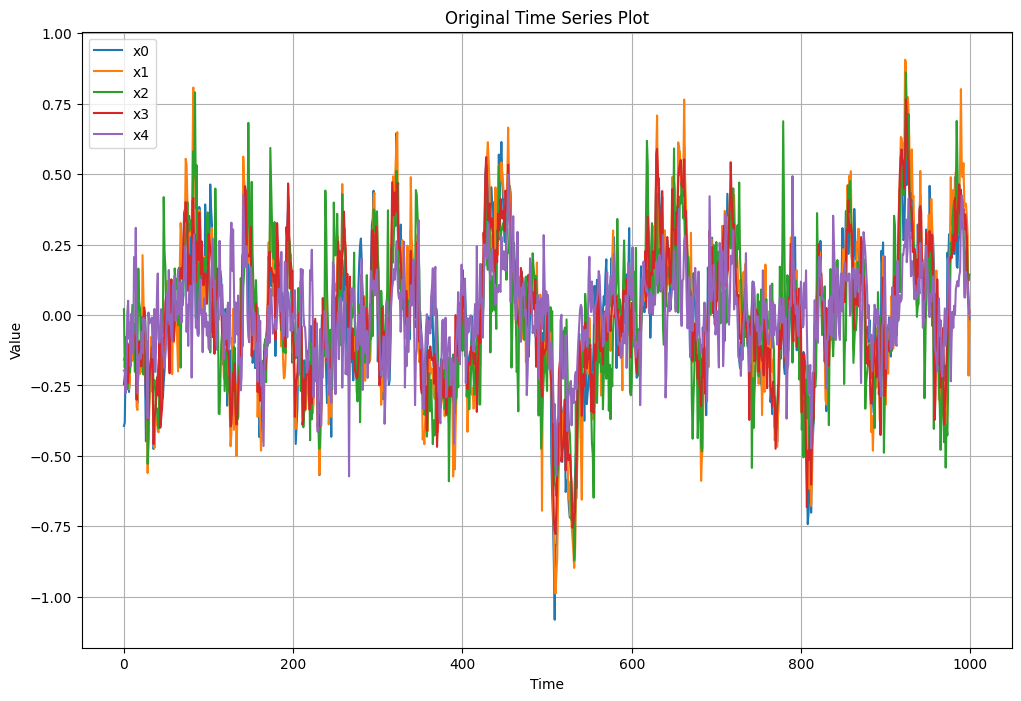


2. Running causal discovery method...

3. Printing results...
Adjacency matrices: [array([[0.   , 0.   , 0.   , 0.   , 0.107],
       [0.457, 0.   , 0.263, 0.   , 0.11 ],
       [0.   , 0.   , 0.   , 0.   , 0.   ],
       [0.   , 0.   , 0.081, 0.   , 0.   ],
       [0.   , 0.   , 0.   , 0.   , 0.   ]]), array([[ 0.479,  0.   , -0.184,  0.   ,  0.   ],
       [ 0.   ,  0.266,  0.   ,  0.   ,  0.   ],
       [ 0.   ,  0.202,  0.517,  0.   ,  0.   ],
       [ 0.057,  0.   ,  0.   ,  0.464, -0.094],
       [ 0.   ,  0.   , -0.171,  0.224,  0.394]]), array([[0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.]]), array([[0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.]]), array([[0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.]]), array(

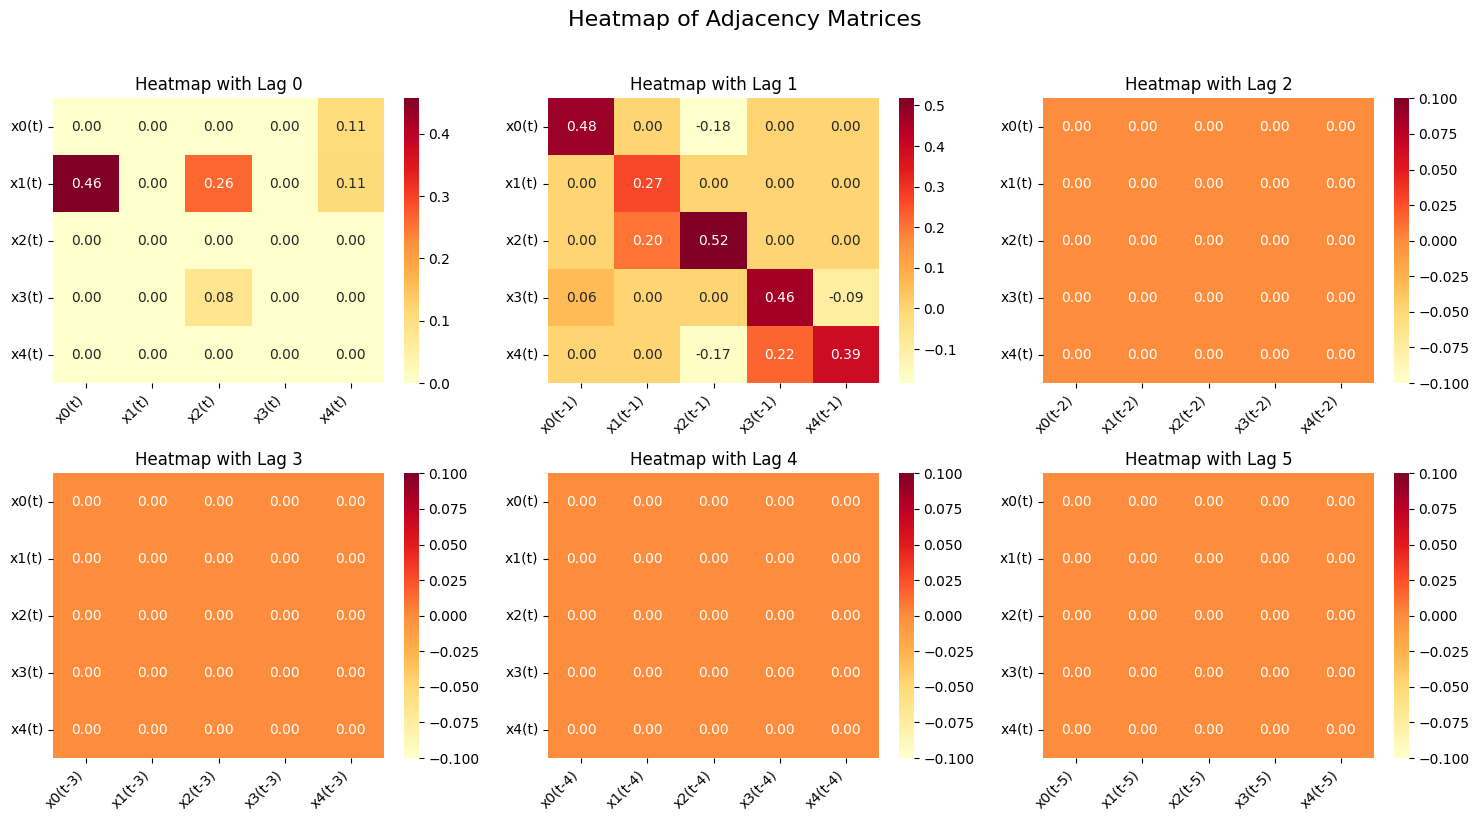

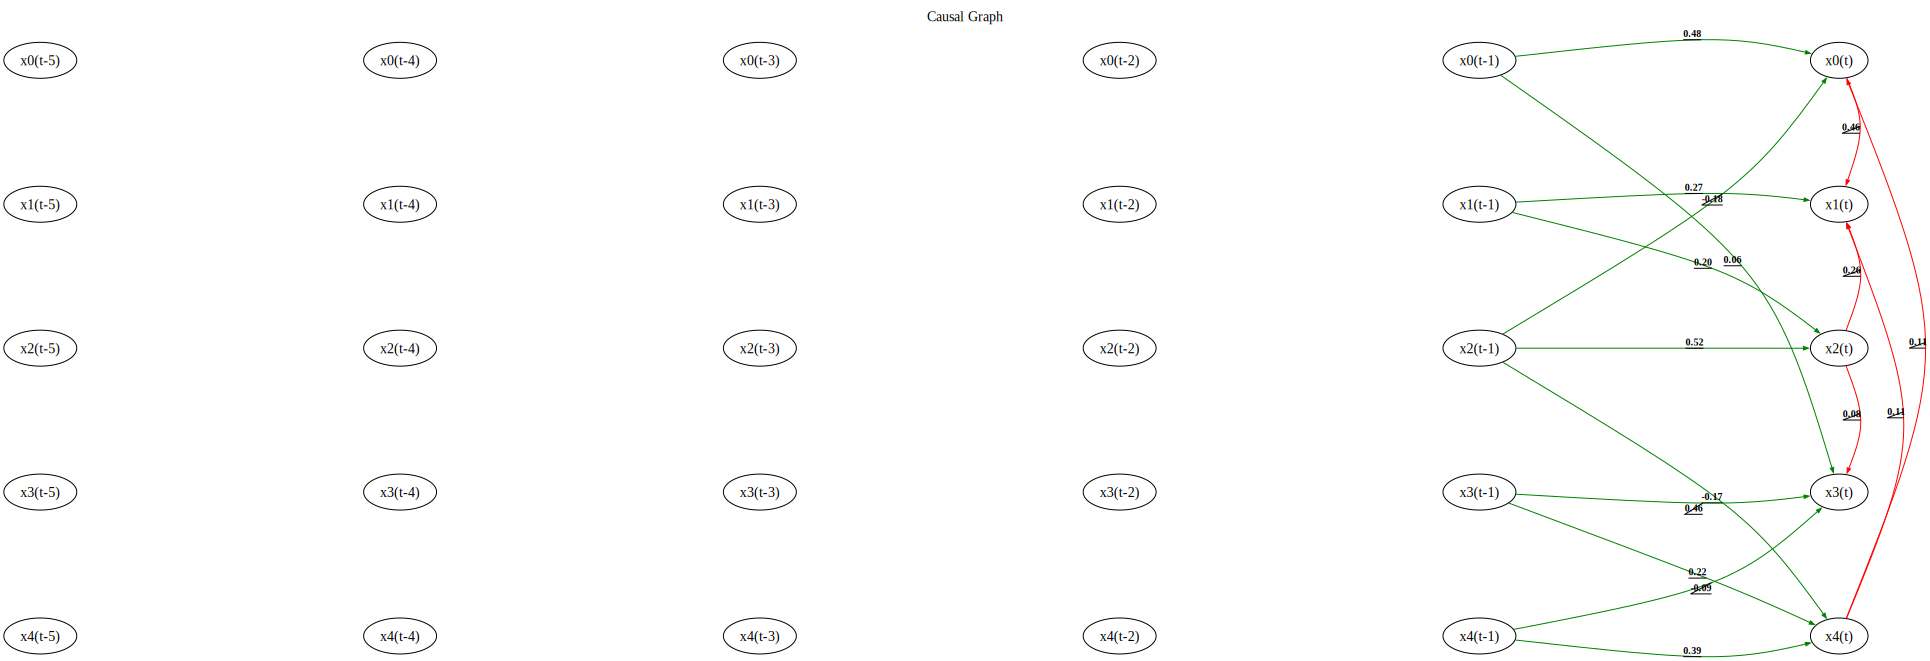

In [5]:
# 1. Load, plot, and preprocess data
print("\n1. Loading, plotting, and preprocessing data...")
data = pd.read_csv('data/artificial/test_data.csv')
columns = data.columns.tolist()
if "Date" in columns:
    data = data.drop(['Date'], axis=1).values
    columns.remove('Date')
else:
    data = data.values
print("Dataset shape:", data.shape)

# Plot original time series
plot_time_series(data, columns, title="Original Time Series Plot")

# Preprocess data
log_vars = None
percent_vars = None
data = preprocess_data(data, columns, log_vars=log_vars, percent_vars=percent_vars)

# 2. Run VARLiNGAM fit() method
print("\n2. Running causal discovery method...")
method = "bootstrap"  # Choose from: 'fit', 'bootstrap'

start_time = time.time()

if method == 'fit':
    results = run_varlingam(data)
    adjacency_matrices = results.adjacency_matrices_
elif method == 'bootstrap':
    adjacency_matrices = run_varlingam_bootstrap(data, lags=5, n_sampling=10, variance_threshold=0.1, occurrence_threshold=0.6)
else:
    print("Invalid method chosen")
    exit()

end_time = time.time()

# 3. Print results and execution time
print("\n3. Printing results...")
print("Adjacency matrices:", adjacency_matrices)
print(f"Execution time: {end_time - start_time} seconds")

# 4. Visualize results
print("\n4. Visualizing results...")
plot_heatmap(adjacency_matrices, columns)
causal_graph = plot_causal_graph(adjacency_matrices, node_labels=columns)
display(causal_graph)

## 3. Performance Comparison and Analysis
This section focuses on comparing the performance of fit() and bootstrap() methods in VAR-LiNGAM, analyzing their results, and evaluating their strengths and weaknesses.


1. Defining ground truth matrices...

2. Loading, plotting, and preprocessing data...
Dataset shape: (1000, 5)


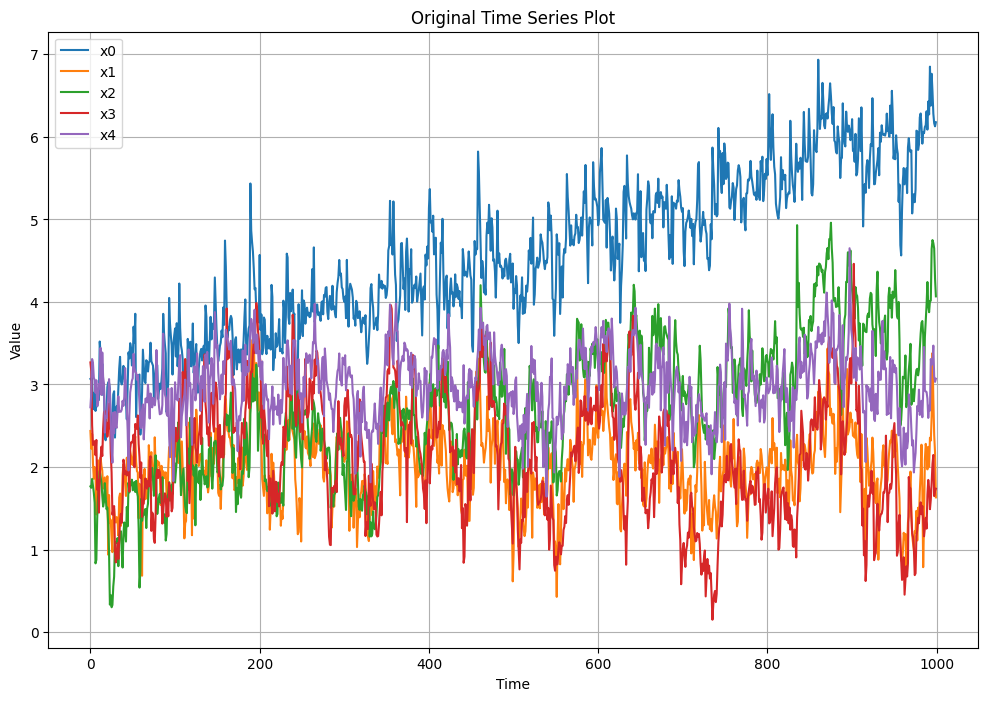


3. Running VAR-LiNGAM fit() method...
Execution time: 0.1542830467224121 seconds

VAR-LiNGAM Fit Results:
True combined: 
 [[0.  0.  0.  0.  0.  0.6 0.  0.1 0.  0. ]
 [0.4 0.  0.  0.  0.  0.  0.5 0.  0.1 0. ]
 [0.  0.3 0.  0.  0.  0.  0.  0.7 0.  0. ]
 [0.1 0.  0.2 0.  0.  0.  0.  0.  0.8 0. ]
 [0.2 0.  0.  0.1 0.  0.  0.  0.2 0.  0.4]]
Est combined: 
 [[ 0.     0.     0.     0.     0.     0.664 -0.093  0.192 -0.009 -0.097]
 [ 0.408  0.     0.     0.     0.    -0.065  0.557 -0.075  0.09   0.097]
 [ 0.036  0.281  0.     0.     0.     0.     0.     0.719 -0.036  0.   ]
 [ 0.     0.115  0.116  0.     0.     0.     0.     0.     0.783  0.081]
 [ 0.124  0.113 -0.077  0.121  0.    -0.06   0.     0.227  0.     0.442]]
SHD:  14.0
Total elements:  14.0
SHD ratio:  1.0
[Frobenius Norm] Good: 0.354. Reasonable match between true and estimated matrices.
[Structural Hamming Distance] Poor: 14.0 (100.00%). Many structural differences.
[f1] Fair: 0.650. Moderate accuracy in identifying causal relati

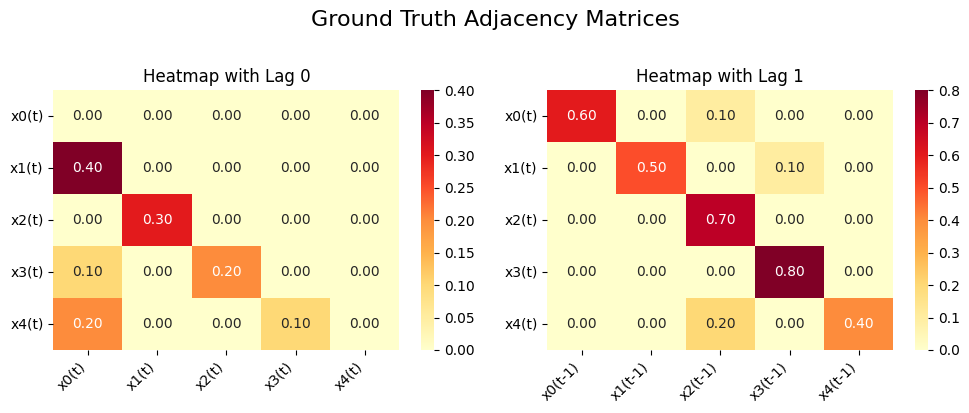

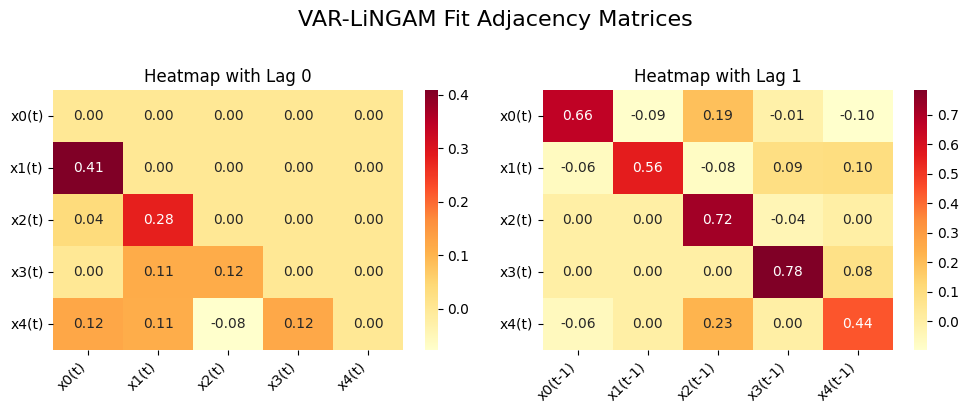

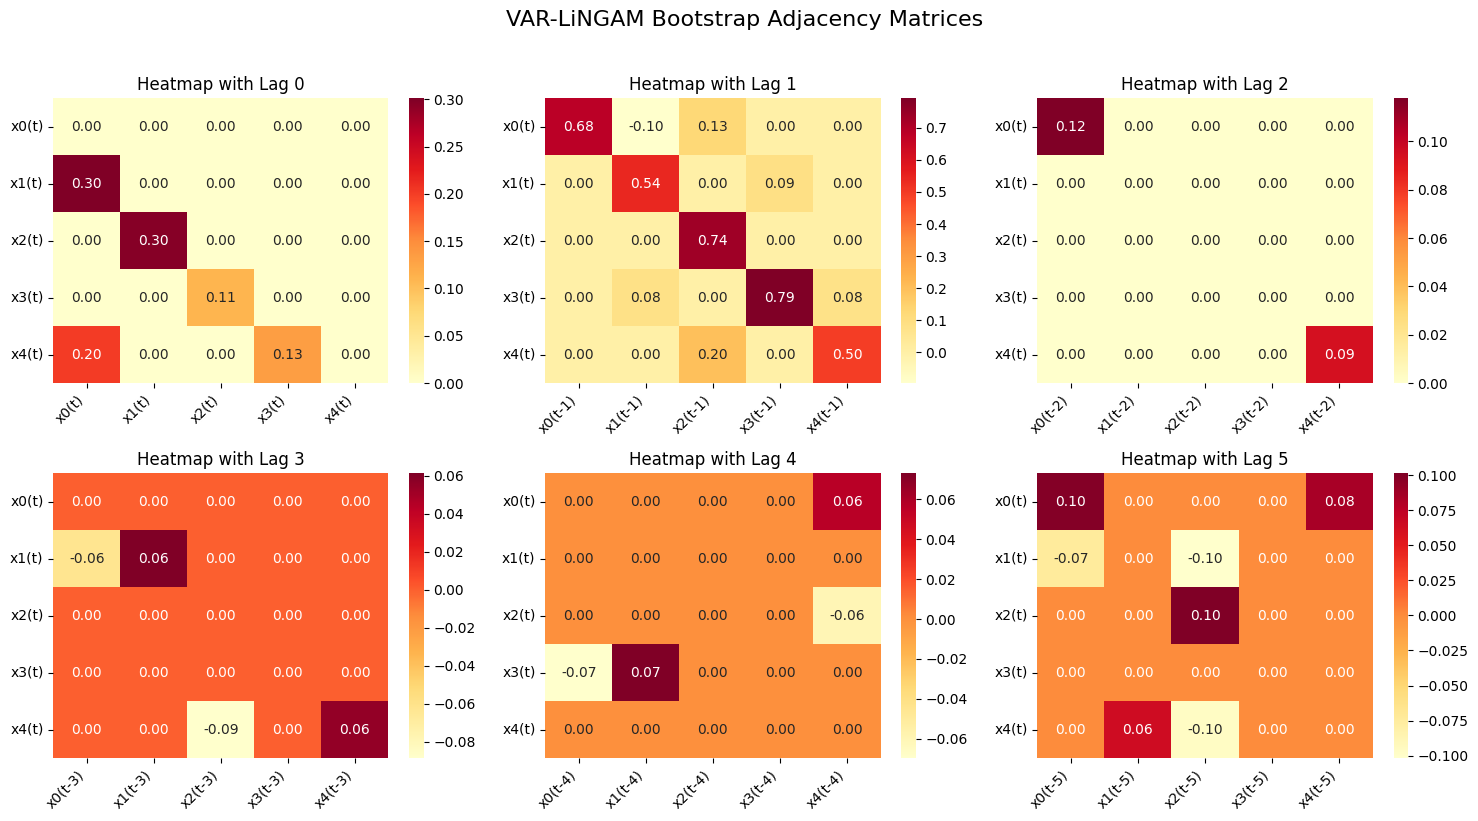

In [7]:
# 1. Define ground truth matrices
print("\n1. Defining ground truth matrices...")
B0_true = np.array([
    [0,   0,   0,   0,   0  ],
    [0.4, 0,   0,   0,   0  ],
    [0,   0.3, 0,   0,   0  ],
    [0.1, 0,   0.2, 0,   0  ],
    [0.2, 0,   0.,  0.1, 0  ]
])

B1_true = np.array([
    [0.6, 0,   0.1, 0,   0  ],
    [0,   0.5, 0,   0.1, 0  ],
    [0,   0,   0.7, 0,   0  ],
    [0,   0,   0,   0.8, 0  ],
    [0,   0,   0.2, 0,   0.4]
])

ground_truth_matrices = [B0_true, B1_true]

# 2. Load, plot, and preprocess data
print("\n2. Loading, plotting, and preprocessing data...")
data_path = 'data/artificial/test_data_with_trends_random.csv'
data = pd.read_csv(data_path)
columns = data.columns.tolist()
if "Date" in columns:
    data = data.drop(['Date'], axis=1).values
    columns.remove('Date')
else:
    data = data.values

print(f"Dataset shape: {data.shape}")
plot_time_series(data, columns, title="Original Time Series Plot")

# Preprocess data
log_vars = None
percent_vars = None
data = preprocess_data(data, columns, log_vars=log_vars, percent_vars=percent_vars)

# 3. Run VAR-LiNGAM fit() method
print("\n3. Running VAR-LiNGAM fit() method...")
start_time = time.time()
fit_model = run_varlingam(data)
fit_matrices = fit_model.adjacency_matrices_
end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

print("\nVAR-LiNGAM Fit Results:")
fit_comparison = evaluate_causal_matrices(ground_truth_matrices, fit_matrices)
fit_interpretations = interpret_evaluation_metrics(fit_comparison)
for metric, interpretation in fit_interpretations.items():
    print(f"[{metric}] {interpretation}")

# 4. Run VAR-LiNGAM bootstrap() method
print("\n4. Running VAR-LiNGAM bootstrap() method...")
start_time = time.time()
bootstrap_matrices = run_varlingam_bootstrap(data, lags=5, n_sampling=10, variance_threshold=0.1, occurrence_threshold=0.6)
end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

print("\nVAR-LiNGAM Bootstrap Results:")
bootstrap_comparison = evaluate_causal_matrices(ground_truth_matrices, bootstrap_matrices)
bootstrap_interpretations = interpret_evaluation_metrics(bootstrap_comparison)
for metric, interpretation in bootstrap_interpretations.items():
    print(f"[{metric}] {interpretation}")

# 5. Compare improvements
print("\n5. Comparing improvements...")
for metric in ["fro", "shd", "f1", "f1_directed"]:
    fit_value = fit_comparison[metric]
    bootstrap_value = bootstrap_comparison[metric]
    
    if metric in ["fro", "shd"]:
        improvement = fit_value - bootstrap_value
        better_word = "decrease" if improvement > 0 else "increase"
    else:  # for f1 and f1_directed
        improvement = bootstrap_value - fit_value
        better_word = "increase" if improvement > 0 else "decrease"
    
    print(f"{metric}: {better_word} of {abs(improvement):.4f}")
    print(f"  Fit     : {fit_value:.4f}")
    print(f"  Bootstrap: {bootstrap_value:.4f}")
    
    if (metric in ["fro", "shd"] and improvement > 0) or (metric in ["f1", "f1_directed"] and improvement > 0):
        print("  Improvement: Yes")
    else:
        print("  Improvement: No")
    print()

# 6. Visualize results
print("\n6. Visualizing results...")
plot_heatmap(ground_truth_matrices, columns, title="Ground Truth Adjacency Matrices")
plot_heatmap(fit_matrices, columns, title="VAR-LiNGAM Fit Adjacency Matrices")
plot_heatmap(bootstrap_matrices, columns, title="VAR-LiNGAM Bootstrap Adjacency Matrices")

#### Hyperparameter Optimization with Grid Search (For Bootstrap Method and the Val_Matrix filter)


1. Loading, plotting, and preprocessing data...
Dataset shape: (1000, 5)


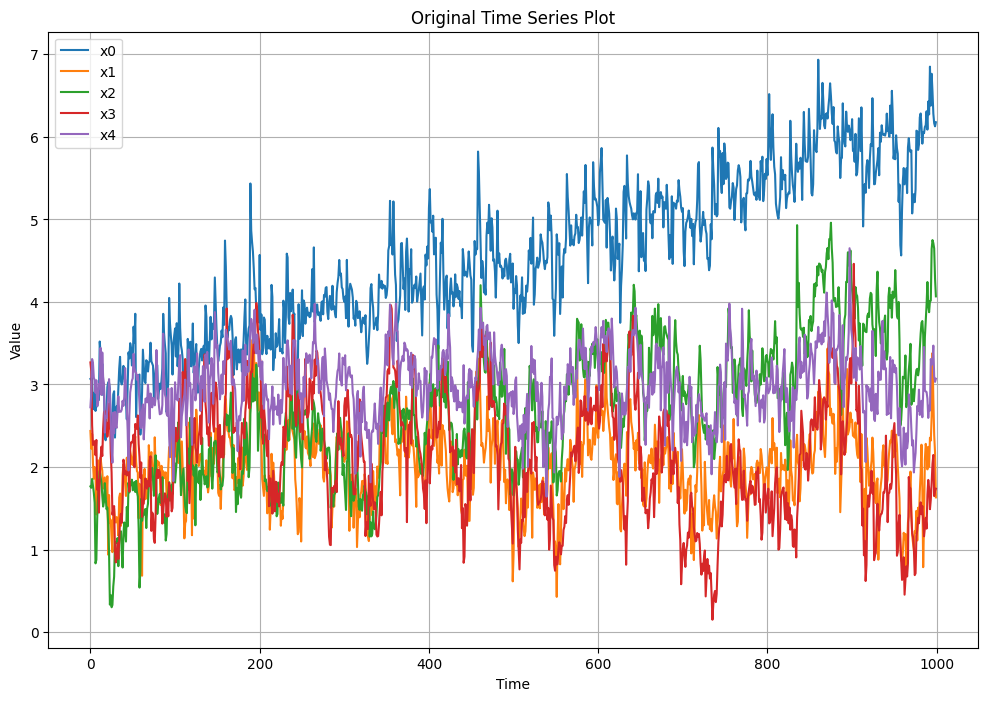


2. Defining ground truth matrices...

3. Performing grid search for RCV-VAR-LiNGAM...
True combined: 
 [[0.  0.  0.  0.  0.  0.6 0.  0.1 0.  0. ]
 [0.4 0.  0.  0.  0.  0.  0.5 0.  0.1 0. ]
 [0.  0.3 0.  0.  0.  0.  0.  0.7 0.  0. ]
 [0.1 0.  0.2 0.  0.  0.  0.  0.  0.8 0. ]
 [0.2 0.  0.  0.1 0.  0.  0.  0.2 0.  0.4]]
Est combined: 
 [[ 0.     0.     0.     0.     0.     0.908 -0.184  0.087  0.     0.09 ]
 [ 0.308  0.     0.     0.     0.    -0.181  0.616 -0.128  0.091  0.073]
 [ 0.     0.192  0.     0.    -0.131  0.116  0.     0.812  0.     0.   ]
 [ 0.     0.233  0.     0.     0.    -0.092  0.     0.072  0.791  0.074]
 [ 0.251  0.     0.     0.14   0.    -0.148  0.167  0.     0.     0.66 ]]
True combined: 
 [[0.  0.  0.  0.  0.  0.6 0.  0.1 0.  0. ]
 [0.4 0.  0.  0.  0.  0.  0.5 0.  0.1 0. ]
 [0.  0.3 0.  0.  0.  0.  0.  0.7 0.  0. ]
 [0.1 0.  0.2 0.  0.  0.  0.  0.  0.8 0. ]
 [0.2 0.  0.  0.1 0.  0.  0.  0.2 0.  0.4]]
Est combined: 
 [[ 0.     0.     0.     0.     0.     0.888 -0.18

In [4]:
# 1. Load, plot, and preprocess data
print("\n1. Loading, plotting, and preprocessing data...")
data_path = 'data/artificial/test_data_with_trends_random.csv'
data = pd.read_csv(data_path)
columns = data.columns.tolist()
if "Date" in columns:
    data = data.drop(['Date'], axis=1).values
    columns.remove('Date')
else:
    data = data.values

print(f"Dataset shape: {data.shape}")
plot_time_series(data, columns, title="Original Time Series Plot")

# Preprocess data
log_vars = None
percent_vars = None
data = preprocess_data(data, columns, log_vars=log_vars, percent_vars=percent_vars)

# 2. Define true matrices (ground truth)
print("\n2. Defining ground truth matrices...")
B0_true = np.array([
    [0,   0,   0,   0,   0  ],
    [0.4, 0,   0,   0,   0  ],
    [0,   0.3, 0,   0,   0  ],
    [0.1, 0,   0.2, 0,   0  ],
    [0.2, 0,   0.,  0.1, 0  ]
])

B1_true = np.array([
    [0.6, 0,   0.1, 0,   0  ],
    [0,   0.5, 0,   0.1, 0  ],
    [0,   0,   0.7, 0,   0  ],
    [0,   0,   0,   0.8, 0  ],
    [0,   0,   0.2, 0,   0.4]
])

true_matrices = [B0_true, B1_true]

# 3. Perform grid search
print("\n3. Performing grid search for RCV-VAR-LiNGAM...")
grid_search_results = grid_search_varlingam_bootstrap(data, true_matrices)

print("\nBest parameters:")
for param, value in grid_search_results['best_params'].items():
    print(f"{param}: {value}")
print(f"Best Frobenius norm: {grid_search_results['best_score']:.4f}")

# 4. Evaluate best matrices
print("\n4. Evaluating best matrices...")
best_matrices = grid_search_results['best_matrices']
evaluation_results = evaluate_causal_matrices(true_matrices, best_matrices)
interpretations = interpret_evaluation_metrics(evaluation_results)

print("\nBest RCV-VAR-LiNGAM Results:")
for metric, interpretation in interpretations.items():
    print(f"[{metric}] {interpretation}")